In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#import mplhep as hep
#plt.style.use(hep.style.ROOT)

In [3]:
L = 0.47 # km length of baseline
def prob(energies): # Calculate SM numu dissapearance
    theta13 = 0.154085
    theta23 = 0.785398
    deltam12 = 7.65e-05 #eV^2
    deltam23 = 2.5e-3 #eV^2
    th = (1-(2*np.sin(theta23)**2*np.cos(theta13)**2-1)**2)
    em = np.sin(1.27*deltam23*L/energies*1e9)**2
    return 1-th*em

In [4]:
fluxloc = "output" # flux file location
inp = "/ub_initial.dat" # file with input flux
if L == 0.47:
    out = "/ub_final_def" # beginning of output fluxes
else:
    out = f"/ub_final_{L}" # beginning of output fluxes
def outarray(mval,tval,cval): # Function to get string filename
    return fluxloc + out + "_m" +"%.3f"%mval + "_t"+"%.3f"%tval + "_c" + "%.3f"%cval + ".dat"
print(fluxloc+inp)

output/ub_initial.dat


In [5]:
# Load Input Data
inpflux = np.loadtxt(fluxloc+inp)
inpenergy = inpflux[:,0] # input flux energy
inpnuflux = inpflux[:,1] # input nu flux
inpnu2flux = inpflux[:,2] # input anti nu flux
SMprob = prob(inpenergy)

In [197]:
# Parameter values (make sure a file with these outputs actually exists)
mval = 0.6
tval = 0.785
cval = 3.25

In [198]:
# Load Output Data
outflux = np.loadtxt(outarray(mval,tval,cval))
outnuflux = outflux[0:200,1]
outnu2flux = outflux[0:200,2]

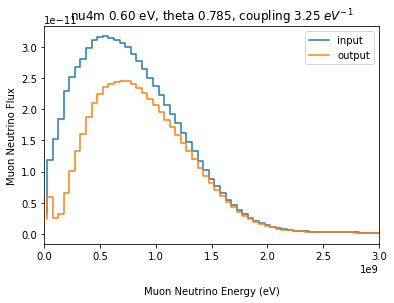

In [199]:
# Comparison Plot
fig, ax = plt.subplots()
ax.plot(inpenergy,inpnuflux, label = "input", drawstyle='steps')
ax.plot(inpenergy,outnuflux, label = "output", drawstyle='steps')
#ax.plot(inpenergy,SMprob*inpnuflux, label = "SM", drawstyle='steps')
ax.set_xlabel("Muon Neutrino Energy (eV)",labelpad=25)
ax.set_ylabel("Muon Neutrino Flux")
ax.set_title("nu4m %.2f eV, theta %.3f, coupling %.2f $eV^{-1}$"%(mval,tval,cval))

ax.set_xlim(0,3e9)
ax.legend()
#fig.savefig("figures/L6SMfluxchange_m%.3f_t%.3f_c%.3f.png"%(mval,tval,cval),dpi=100)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


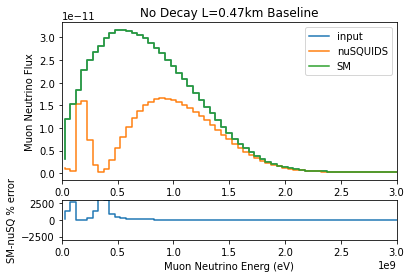

In [9]:
# Comparison plus error plot
fig, ax = plt.subplots(2,1,gridspec_kw={
                           'width_ratios': [6],
                           'height_ratios': [4,1]})
ax[0].plot(inpenergy,inpnuflux, label = "input", drawstyle='steps')
ax[0].plot(inpenergy,outnuflux, label = "nuSQUIDS", drawstyle='steps')
ax[0].plot(inpenergy,SMprob*inpnuflux, label = "SM", drawstyle='steps')
ax[0].set_ylabel("Muon Neutrino Flux")
ax[0].set_title(f"No Decay L={L}km Baseline")

ratioerror = (SMprob*inpnuflux-outnuflux)/(outnuflux)*100
ratran = max(abs(min(ratioerror)),abs(max(ratioerror)))

ax[1].set_xlabel("Muon Neutrino Energ (eV)")
ax[1].plot(inpenergy,ratioerror,  drawstyle='steps')
ax[1].set_ylabel("SM-nuSQ % error")

ax[0].set_xlim(0,3e9)
ax[1].set_xlim(0,3e9)
ax[1].set_ylim(-ratran/5,ratran/5)
ax[0].legend()
#fig.savefig("figures/LR5SMfluxchange_m%.3f_t%.3f_c%.3f.png"%(mval,tval,cval),dpi=100)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


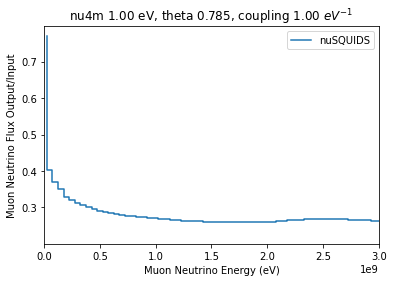

In [22]:
# Ratio Plot
fig, ax = plt.subplots()
ax.plot(inpenergy,outnuflux/inpnuflux, drawstyle='steps', label = "nuSQUIDS")
#ax.plot(inpenergy,SMprob, linestyle='dashed', drawstyle='steps', label = "SM")
ax.set_xlabel("Muon Neutrino Energy (eV)")
ax.set_ylabel("Muon Neutrino Flux Output/Input")
ax.set_title("nu4m %.2f eV, theta %.3f, coupling %.2f $eV^{-1}$"%(mval,tval,cval))
#ax.set_title(f"No Decay L={L}km Baseline")

ax.legend()
ax.set_xlim(0,3e9)
plt.show()
#fig.savefig("figures/L5RSMfluxchange_m%.3f_t%.3f_c%.3f.png"%(mval,tval,cval),dpi=100)

In [17]:
# Set mass and tau ranges

mstep = 0.1
mmin = 0
mmax = 5.1
mrange = np.arange(mmin,mmax,mstep)

tstep = 1
tmin = 0.785
tmax = 0.785
trange = np.arange(tmin,tmax,tstep)

cstep = 0.25
cmin = 0
cmax = 5.25
crange = np.arange(cmin,cmax,cstep)

In [18]:
# Load flux files
fluxratios = np.zeros((len(mrange),len(crange),200))
for mi, m in enumerate(mrange):
    for ci, c in enumerate(crange):
        outflux = np.loadtxt(outarray(m,tval,c))
        outnuflux = outflux[0:200,1]
        if not np.isnan(outnuflux).any():
            fluxratios[mi][ci] = outnuflux/inpnuflux
        else:
            fluxratios[mi][ci] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


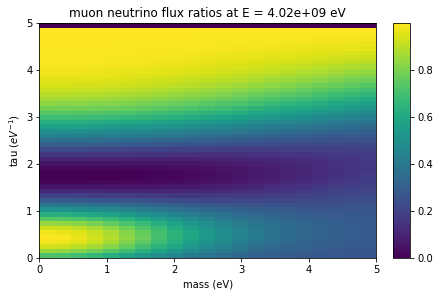

In [206]:
# Constant Energy plot
enindex = 80
extent = np.min(mrange), np.max(mrange), np.min(crange), np.max(crange)
fig, ax = plt.subplots(constrained_layout=True)
im = plt.imshow(fluxratios[:,:,enindex],extent = extent, aspect = "auto", )
plt.xlabel("mass (eV)")
plt.ylabel("tau ($eV^{-1}$)")
plt.title(f'muon neutrino flux ratios at E = {inpenergy[enindex]:.2e} eV')
#plt.pcolormesh(mrange,crange,fluxratios[:,:,enindex],vmin = 0, vmax = 1)
plt.colorbar()
fig.savefig(f'figures/fluxratio_E{inpenergy[enindex]:.2e}.png',dpi=100)

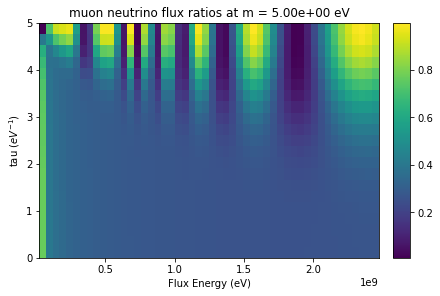

In [115]:
# Constant Mass
mindex = 50 # index of mass to use
emax = 50 # energy cutoff
extent = np.min(inpenergy[:emax]), np.max(inpenergy[:emax]), np.min(crange), np.max(crange)
fig, ax = plt.subplots(constrained_layout=True)
im = plt.imshow(fluxratios[mindex,:,:emax],extent = extent, aspect = "auto", )
plt.xlabel("Flux Energy (eV)")
plt.ylabel("tau ($eV^{-1}$)")
plt.title(f'muon neutrino flux ratios at m = {mrange[mindex]:.2e} eV')
#plt.pcolormesh(mrange,crange,fluxratios[:,:,enindex],vmin = 0, vmax = 1)
plt.colorbar()
fig.savefig(f'figures/fluxratio_m{mrange[mindex]}.png',dpi=100)

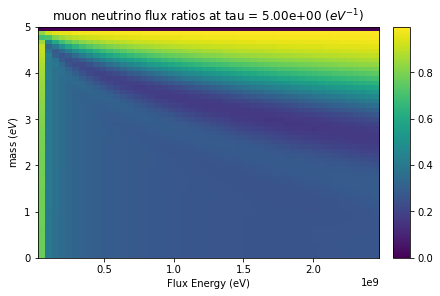

In [105]:
# Constant Tau
cindex = 20 # index of tau to use
emax = 50 # energy cutoff
extent = np.min(inpenergy[:emax]), np.max(inpenergy[:emax]), np.min(mrange), np.max(mrange)
fig, ax = plt.subplots(constrained_layout=True)
im = plt.imshow(fluxratios[:,cindex,:emax],extent = extent, aspect = "auto", )
plt.xlabel("Flux Energy (eV)")
plt.ylabel("mass ($eV$)")
plt.title(f'muon neutrino flux ratios at tau = {crange[cindex]:.2e} '+"($eV^{-1}$)")
#plt.pcolormesh(mrange,crange,fluxratios[:,:,enindex],vmin = 0, vmax = 1)
plt.colorbar()
fig.savefig(f'figures/fluxratio_c{crange[cindex]:.2e}.png',dpi=100)